In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%matplotlib inline

In [11]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv.csv")

In [12]:
internet_df = pd.read_csv("../data/internet_use.csv.csv", nrows = 4496)

7. Look at the shape of each DataFrame - how many rows? How many columns

In [26]:
row_count = len(gdp_df)
column_count = gdp_df.shape
row_row = len(internet_df)
col_umn = internet_df.shape
print("info for gdp")
print( row_count)
print(column_count)
print("info for internet")
print(row_row)
print(col_umn)

info for gdp
6870
(6870, 4)
info for internet
4496
(4496, 4)


8. Take a look at the datatypes for the columns in each DataFrame.

In [40]:
#first run a test to see what the columns are actually called. 
#print(gdp_df)
#print(internet_df)
#then use a hashtag to comment out the print() and type the columns
gdp_df.columns = [c.replace(' ', '_') for c in gdp_df.columns]
internet_df.columns = [c.replace(' ', '_') for c in internet_df.columns]
type(gdp_df.Country_or_Area)
type(gdp_df.Year)
type(gdp_df.Value)

type(internet_df.Country)
type(internet_df.Year)
type(internet_df.Value)

pandas.core.series.Series

9. Take a look at the last 10 rows of each DataFrame in turn.

In [41]:
gdp_df.tail(10) #start at the head or start at the tail?
internet_df.tail(10)

,Country,Year,Value,Value_Footnotes
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN
4495,footnoteSeqID,Footnote,NaN,NaN


10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [42]:
del gdp_df['Value_Footnotes']
gdp_df.head(10)
#had a bit of difficulty with this one as I initially attempted gdp_df.pop() and gdp_df.drop(['Value_Footnotes'])
del internet_df['Value_Footnotes']
internet_df.head(3)
#it's easier to comment out one group rathe than run two

,Country,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545


11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [43]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df)

            Country                                      Year  GDP_Per_Capita
0       Afghanistan                                      2019     2065.036398
1       Afghanistan                                      2018     2033.779002
2       Afghanistan                                      2017     2058.383832
3       Afghanistan                                      2016     2057.062164
4       Afghanistan                                      2015     2068.265904
...             ...                                       ...             ...
6865       Zimbabwe                                      1992     3054.889178
6866       Zimbabwe                                      1991     3426.598094
6867       Zimbabwe                                      1990     3324.348171
6868  footnoteSeqID                                  Footnote             NaN
6869              2  Excludes South Sudan after July 9, 2011.             NaN

[6870 rows x 3 columns]


12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [44]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
print(internet_df)

            Country      Year  Internet_Users_Pct
0       Afghanistan      2014            6.390000
1       Afghanistan      2013            5.900000
2       Afghanistan      2012            5.454545
3       Afghanistan      2011            5.000000
4       Afghanistan      2010            4.000000
...             ...       ...                 ...
4491       Zimbabwe      1996            0.016790
4492       Zimbabwe      1995            0.007684
4493       Zimbabwe      1994            0.001739
4494       Zimbabwe      1990            0.000000
4495  footnoteSeqID  Footnote                 NaN

[4496 rows x 3 columns]


13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [93]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = "left", on = ['Country', 'Year'])

gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


14. Look at the first five rows of your new DataFrame to confirm it merged correctly

In [20]:
#way ahead of ya there, chief.

15. Look at the last five rows to make sure the data is clean and as expected.

In [46]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,0.0
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [47]:
filter_list = ['2004', '2009', '2014']
gdp_and_internet_use[gdp_and_internet_use.Year.isin(filter_list)]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
6818,Zambia,2009,2917.516220,6.310000
6823,Zambia,2004,2261.766537,2.013550
6843,Zimbabwe,2014,2955.240287,19.890000
6848,Zimbabwe,2009,1925.364381,11.360000


17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [76]:
f04= ['2004']
f09= ['2009']
f14= ['2014']
gdpi_04 = gdp_and_internet_use[gdp_and_internet_use.Year.isin(f04)]
gdpi_09 = gdp_and_internet_use[gdp_and_internet_use.Year.isin(f09)]
gdpi_14 = gdp_and_internet_use[gdp_and_internet_use.Year.isin(f14)]
print(gdpi_04)
print(gdpi_09)
print(gdpi_14)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
15            Afghanistan  2004     1200.278256            0.105809
33                Albania  2004     7604.838002            2.420388
63                Algeria  2004    10058.435939            4.634475
93                 Angola  2004     5593.241537            0.464815
123   Antigua and Barbuda  2004    18745.681534           24.266544
...                   ...   ...             ...                 ...
6737              Vietnam  2004     3689.732423                 NaN
6767   West Bank and Gaza  2004     4485.525458                 NaN
6793                World  2004    12077.823821                 NaN
6823               Zambia  2004     2261.766537            2.013550
6853             Zimbabwe  2004     2480.859342            6.564045

[234 rows x 4 columns]
                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
10            Afghanistan  2009     1758.904043                3.55
28                Albani

In [6]:
# Let's retry that one, make it cleaner.
# if gdp_and_internet_use.Year == 2004:
#     print(gdp_and_internet_use as gdpi_04)
# elif gdp_and_internet_use.Year == 2009:
#     print(gdp_and_internet_use as gdpi_09)
# elif gdp_and_internet_use.Year == 2014:
#     print(gdp_and_internet_use as gdpi_14)
# else:
#     end --Clearly that was nonsense and did not work. We will come back to this.



18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [53]:
gdpi_14.sort_values(by= 'Internet_Users_Pct', ascending=False)
# Way to go Iceland! 98.16% is not too shabby.

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
3691,Luxembourg,2014,108760.916030,94.67
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [54]:
#This question seems easy enough, just flip the previous code to be ascending= true
gdpi_14.sort_values(by= 'Internet_Users_Pct', ascending=True)
#And we get Timor-Leste with 1.14%. It looks like a small half-island country just above Australia

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
2326,Guinea,2014,2061.760973,1.72
4528,Niger,2014,1127.615541,1.95
5434,Sierra Leone,2014,1997.511853,2.10
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


20. Repeat for 2004 and 2009

In [66]:
int_high04 = gdpi_04.sort_values(by= 'Internet_Users_Pct', ascending=False)
int_high09 = gdpi_09.sort_values(by= 'Internet_Users_Pct', ascending=False)
print(int_high04.head(2)) 
print(int_high09.head(2))
# I initially tried just df.tail but was getting NaN returns. We can't combine .dropna & .tail, so let's prefunction it.
# int_high04.dropna()
# int_high09.dropna()
# print(int_high04.tail(2)) 

# print(int_high09.tail(2)) --Not working so far, still getting NaNs so let's go the long way.
int_low04 = gdpi_04.sort_values(by= 'Internet_Users_Pct', ascending=True)
int_low09 = gdpi_09.sort_values(by= 'Internet_Users_Pct', ascending=True)

print(int_low04.head(2))
print(int_low09.head(2))

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019   Sweden  2004    44496.023401               83.89
2635  Iceland  2004    45145.545658               83.88
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630  Iceland  2009    48177.084123               93.00
4653   Norway  2009    61886.564498               92.08
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
4342  Myanmar  2004     1696.881760            0.024337
3545  Liberia  2004     1181.546158            0.031011
          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6224  Timor-Leste  2009     2724.770973            0.185252
4337      Myanmar  2009     2874.780227            0.220000


In [67]:
#That's a hodgepodge of dirty code, so here's what we found out: In 2004 Sweden was the highest by .01% with a total of 83.89%
#Myanmar was the lowest in 2004 with 0.024%
# In 2009 Iceland pulled ahead with an even 93% but Myanmar climbed out of last place, leaving Timor-Leste with 0.185%

21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [71]:
hi_cap14 = gdpi_04.sort_values(by= 'GDP_Per_Capita', ascending=False)
print(hi_cap14)
#Luxembourg, you little rascal. How'd you get 102708.212

                   Country  Year  GDP_Per_Capita  Internet_Users_Pct
3701            Luxembourg  2004   102708.212547           65.880000
6527  United Arab Emirates  2004    97758.023345           30.131296
5148                 Qatar  2004    93748.301216           20.701648
571                Bermuda  2004    90195.811033           60.990867
5306            San Marino  2004    80391.828516           50.566343
...                    ...   ...             ...                 ...
837                Burundi  2004      817.460585            0.349060
1856              Ethiopia  2004      793.093786            0.155335
4312            Mozambique  2004      792.727155            0.679448
3791                Malawi  2004      775.346132            0.347505
1432       Dem. Rep. Congo  2004      757.685942                 NaN

[234 rows x 4 columns]


22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [72]:
print(hi_cap14.tail)
#Malawi has the lowest GDP per capita with .3475%

<bound method NDFrame.tail of                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
3701            Luxembourg  2004   102708.212547           65.880000
6527  United Arab Emirates  2004    97758.023345           30.131296
5148                 Qatar  2004    93748.301216           20.701648
571                Bermuda  2004    90195.811033           60.990867
5306            San Marino  2004    80391.828516           50.566343
...                    ...   ...             ...                 ...
837                Burundi  2004      817.460585            0.349060
1856              Ethiopia  2004      793.093786            0.155335
4312            Mozambique  2004      792.727155            0.679448
3791                Malawi  2004      775.346132            0.347505
1432       Dem. Rep. Congo  2004      757.685942                 NaN

[234 rows x 4 columns]>


23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

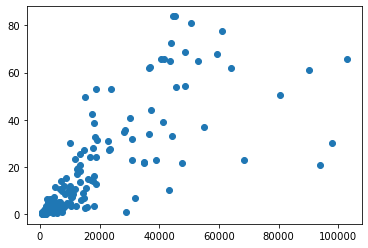

In [77]:
# Plot for 04
plt.scatter(gdpi_04.GDP_Per_Capita, gdpi_04.Internet_Users_Pct)
plt.show()

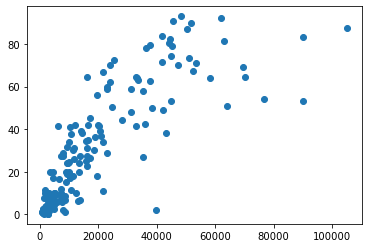

In [78]:
#Plot for 09
plt.scatter(gdpi_09.GDP_Per_Capita, gdpi_09.Internet_Users_Pct)
plt.show()

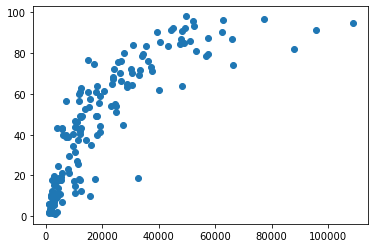

In [79]:
#Plot for 14
plt.scatter(gdpi_14.GDP_Per_Capita, gdpi_14.Internet_Users_Pct)
plt.show()

24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

In [80]:
#Typically those with more internet usage have higher GDPs. 
#This is true as the world becomes more technologically dependent on the internet with years.
#It also shows a cluster, that there will always be more on the lower end than the higher end. 

25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

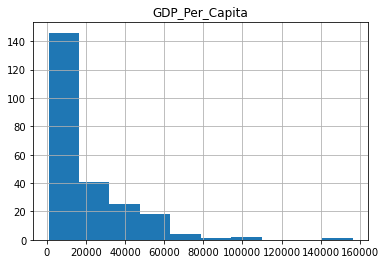

In [85]:

#plt.bar(gdpi_14.Country, gdpi_14.GDP_Per_Capita)
#plt.show()
gdpi_14.hist('GDP_Per_Capita', bins=10)
#it seems very limited in scope so yes, it is unimodal

26. Look at the distribution of Internet Use for 2014. Is it unimodal?

array([[<AxesSubplot:title={'center':'Internet_Users_Pct'}>]],
      dtype=object)

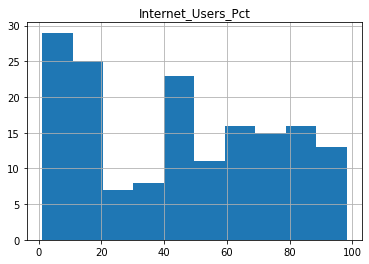

In [86]:
gdpi_14.hist('Internet_Users_Pct', bins=10)
#This one is not unimodel. There are many countries with under 20% using internet.
#There is also many more pm their way towards standardization with over 40%

27. What are the top 5 countries in terms of internet use in 2014?

In [95]:
an_27 = gdpi_14.sort_values(by= 'Internet_Users_Pct', ascending=False).head()
an_27
#I feel like Luxembourg is so small it's off because of total population configured into a percent. 

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
3691,Luxembourg,2014,108760.916030,94.67


28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.



In [107]:
# target_countries= gdp_and_internet_use({'Country':['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Luxembourg']})
# target_year = gdp_and_internet_use({'Year':[2004, 2009, 2014]})
# df_target['Internet_Users_Pct'] --This wasn't working

filter = an_27['Country'] == 'Country'


top_5_internet = [gdpi_04.where(filter, inplace = True), gdpi_09.where(filter, inplace = True), an_27]
print(gdpi_04.where(filter, inplace = True))

[None, None,          Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625     Iceland  2014    49652.149500               98.16
561      Bermuda  2014    77361.104881               96.80
4648      Norway  2014    62589.373548               96.30
1452     Denmark  2014    52214.537753               95.99
3691  Luxembourg  2014   108760.916030               94.67]
